# Classification of MNIST data set with Random Forest Algorithm

In [1]:
# Import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Load MNIST data set from sci-kit Learn Library.
mnist_data = datasets.load_digits() 

In [3]:
mnist_data

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

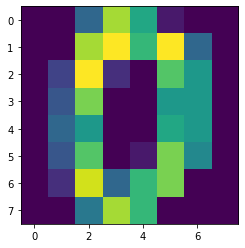

In [4]:
# Show the first image from the data set.
plt.subplot()
plt.imshow(mnist_data.images[0])

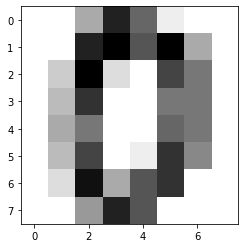

In [5]:
# Show the first image gray-scale.
plt.subplot()
plt.imshow(mnist_data.images[0], cmap=plt.cm.gray_r)

In [6]:
# Identify the target value for the first image.
mnist_data.target[0]

0

In [7]:
# Show the shape of mnist_data.images as a numpy.ndarray.
np.shape(mnist_data.images)

(1797, 8, 8)

In [8]:
# The data set of mnist_data.images has 1797 samples of 8*8 images. For classification purposes,
# we have to reshape this 8*8 images to 64-element lists.
# To put it in another way, we must transform an 8*8 matrix to a single list (with 64 elements).
X = mnist_data.images.reshape(len(mnist_data.images), -1)

In [9]:
# Now we have 1797 samples, which each sample has 64 features.
np.shape(X)

(1797, 64)

In [10]:
# The content of this data set.
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [11]:
# Specify the mnist_data targets.
y = mnist_data.target
type(y), y, len(y)

(numpy.ndarray, array([0, 1, 2, ..., 8, 9, 8]), 1797)

In [12]:
# Import Random Forest classifier from sci-kit library.
from sklearn.ensemble import RandomForestClassifier

In [13]:
# Create a Random Forest classifier.
random_forest_classifier = RandomForestClassifier(n_estimators=1000)

In [14]:
# Learn from the data.
random_forest_classifier.fit(X[:1000], y[:1000])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
# Now let's evaluate our model with specific metrics.
from sklearn import metrics

In [16]:
# We must give our test data set to metrics.
# With metrics.classification_report, the accuracy, precision and recall of our model are found out.
predicted_values = random_forest_classifier.predict(X[1000:])
expected_values = y[1000:]
print(metrics.classification_report(expected_values, predicted_values))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.95      0.89      0.92        80
           2       1.00      0.90      0.95        77
           3       0.88      0.84      0.86        79
           4       0.98      0.95      0.96        83
           5       0.89      0.98      0.93        82
           6       0.98      0.99      0.98        80
           7       0.92      1.00      0.96        80
           8       0.92      0.89      0.91        76
           9       0.87      0.93      0.90        81

    accuracy                           0.93       797
   macro avg       0.94      0.93      0.93       797
weighted avg       0.94      0.93      0.93       797



In [17]:
# Show the confusion matrix of our model.
print(metrics.confusion_matrix(expected_values, predicted_values))

[[78  0  0  0  1  0  0  0  0  0]
 [ 0 71  0  2  0  1  0  0  0  6]
 [ 1  0 69  5  0  0  0  0  0  2]
 [ 0  1  0 66  0  3  0  4  5  0]
 [ 0  0  0  0 79  0  0  2  0  2]
 [ 0  0  0  0  0 80  2  0  0  0]
 [ 0  1  0  0  0  0 79  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  2  0  0  1  3  0  1 68  1]
 [ 0  0  0  2  0  3  0  0  1 75]]
